In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

# Arxiv -- Date and Submission

just saw this (https://academia.stackexchange.com/questions/50140/is-there-a-correlation-between-submission-date-on-arxiv-and-citations) and thought it would be a topic to explore

In [2]:
# set the month as index of the df
df_month = pd.read_csv("get_monthly_submissions.csv", index_col="month", parse_dates=True)

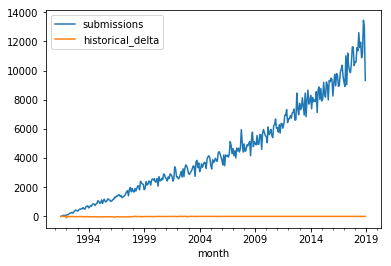

In [3]:
df_month.plot()

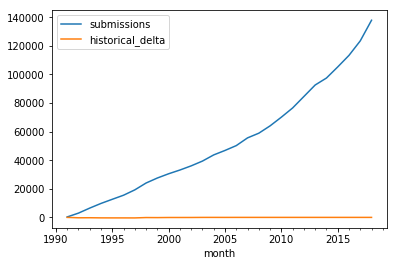

In [8]:
df_month.resample("Y").sum().plot()

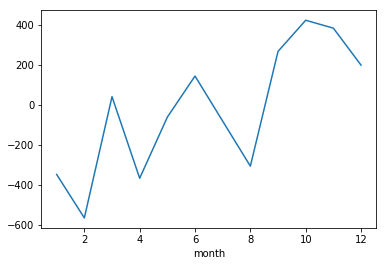

In [15]:
(df_month.submissions.groupby(df_month.index.month).median() - df_month.submissions.median()).plot()

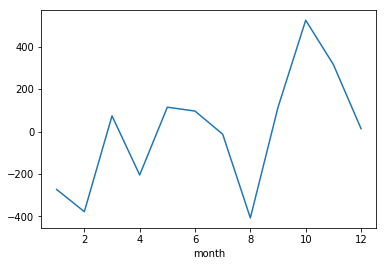

In [14]:
(df_month.submissions.groupby(df_month.index.month).mean() - df_month.submissions.mean()).plot()

## Our astro-ph data

In [37]:
df_astro = pd.read_csv("df_astro_00-18.csv", index_col="created", parse_dates=True)
df_astro.shape

(237090, 6)

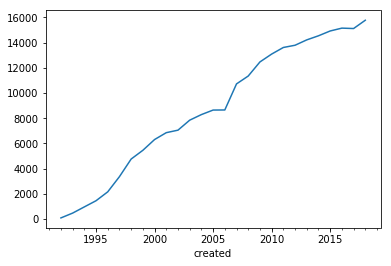

In [38]:
df_astro.title.resample("Y").count().plot()

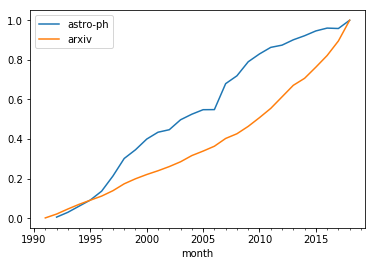

In [39]:
(df_astro.title.resample("Y").count() / df_astro.title.resample("Y").count().max()).plot(label="astro-ph")
(df_month.submissions.resample("Y").sum() / df_month.submissions.resample("Y").sum().max()).plot(label="arxiv")
plt.legend()

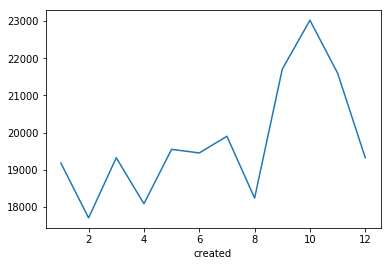

In [40]:
df_astro.title.groupby(df_astro.index.month).count().plot()

Monthly variations are almost the same!

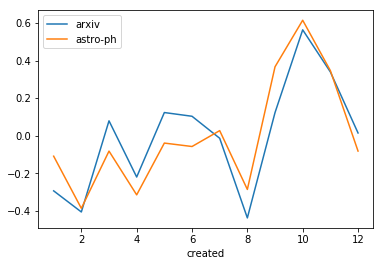

In [45]:
# whole arxiv
(
    (df_month.submissions.groupby(df_month.index.month).mean() 
    - df_month.submissions.mean()) / \
    (df_month.submissions.groupby(df_month.index.month).mean().max()
    - df_month.submissions.groupby(df_month.index.month).mean().min())
).plot(label="arxiv")

# astro-ph
(
    (df_astro.title.groupby(df_astro.index.month).count() 
     - df_astro.title.groupby(df_astro.index.month).count().mean()) / \
    (df_astro.title.groupby(df_astro.index.month).count().max()
    - df_astro.title.groupby(df_astro.index.month).count().min())
).plot(label="astro-ph")

plt.legend()

Just take a look at daily variation

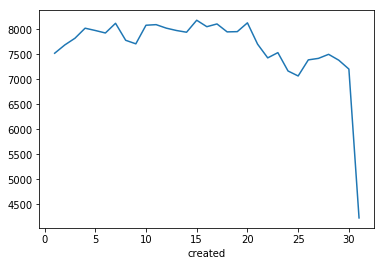

In [48]:
# 1 - 31
df_astro.title.groupby(df_astro.index.day).count().plot()

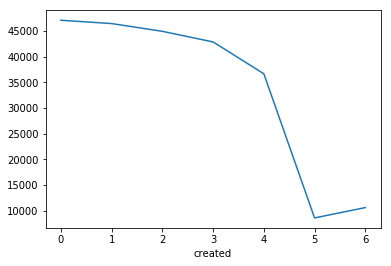

In [52]:
# days in a week
df_astro.title.groupby(df_astro.index.dayofweek).count().plot()